<a href="https://colab.research.google.com/github/lovegohome/TIL/blob/main/Ch05_DiscreateRandomVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH05. 이산형 확률분포

# 5.1 **1차원 이산형 확률변수**


In [ ]:
# 라이브러리: NumPy(수식), Matplotlib(그림)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

## 5.1.1 **1차원 이산형 확률변수의 정의**

용어정리

## **Random Variable (확률변수)**

확률변수는 함수(function)입니다. 

즉, 표본공간(sample space)에 있는 원소를 실수로 대응시키는 함수입니다. 



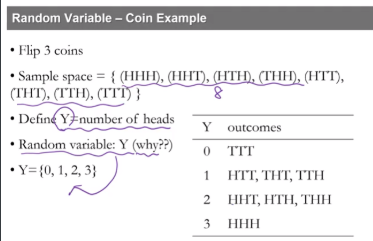

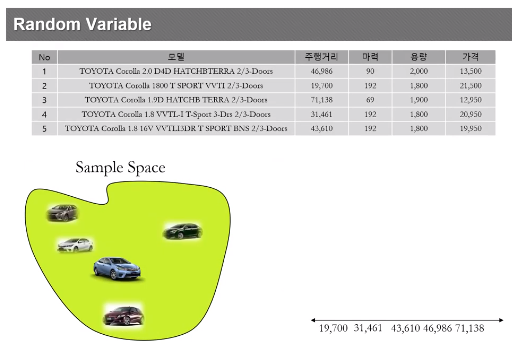

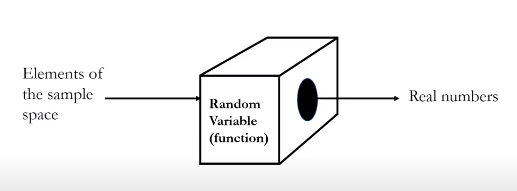

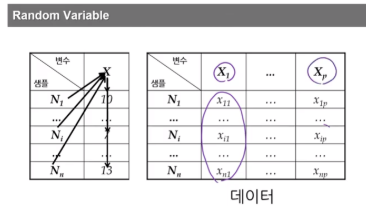

- 확률변수
  - 이산형(Discreate ~, countable)

    ex) 코로나19 확진자 수, 주사위 값
  - 연속형(Continuous ~, uncountable)

    ex) 18홀 골프 치는 데 걸리는 시간, 서울시민 연소득



## Probability Function (확률함수)




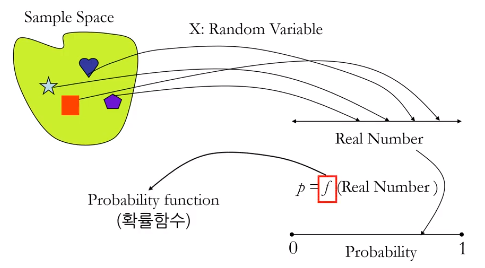

- 0~1 값
- 모든 p의 합 = 1

확률변수에도 이산형과 연속형이 있었던 것처럼
**확률함수**에도 두 가지로 나뉩니다.


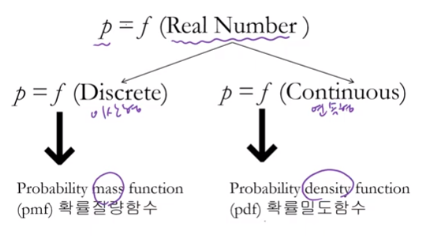

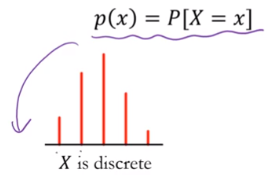


probability mass function = PMF

**실행** (p.116)

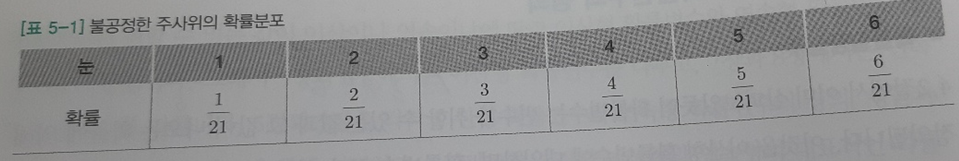

불공정한 주사위의 확률변수를 파이썬으로 구현해봅시다.

In [2]:
x_set = np.array([1,2,3,4,5,6])

In [3]:
x_set

array([1, 2, 3, 4, 5, 6])

In [6]:
def f(x):                 # 확률을 반환하는 함수
    if x in x_set:
        return x / 21
    else:
        return 0

In [9]:
X = [x_set, f]            # 확률변수 X 정의

[array([1, 2, 3, 4, 5, 6]), <function __main__.f>]

In [10]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

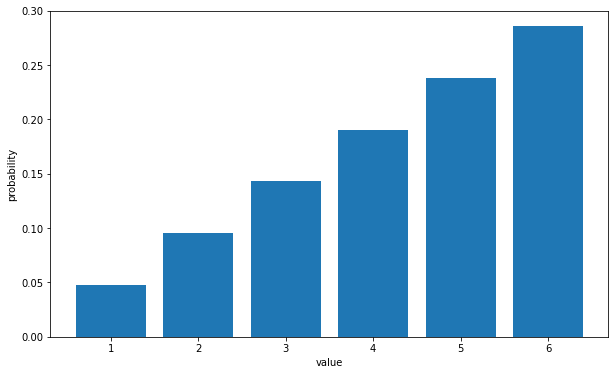

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

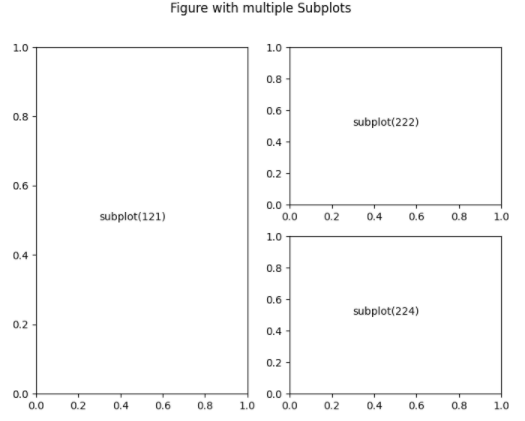

- 확률의 성질 

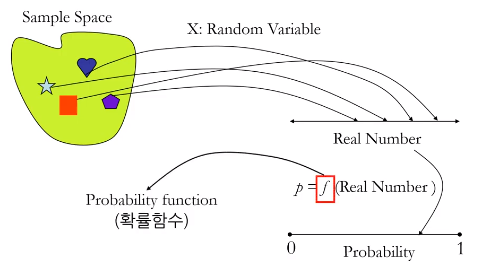

In [33]:
np.all(prob >= 0)

True

In [34]:
np.sum(prob)

1.000

- 누적분포함수 (p.120)

In [35]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [36]:
F(3)

0.286

- 확률변수의 변환과 확률분포(p.121)

    주사위 X -> 2X + 3 

    - X : {1,2,3,4,5,6}
    - Y = 2X + 3
    - Y : {5,7,9,11,13,15}
    

    (확률변수의 표준화: 평균 빼고 표준편차로 나눌 때 중요한 연산)


In [37]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))
# 변환 후도 확률변수, X_k의 확률과 Y_k의 확률이 같다. 

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

- 확률변수 - 이산형, 연속형
- 확률함수 - 이산형(PMF), 연속형(PDF)
- 확률분포
- 확률의 성질 
- 누적분포함수
- 확률변수의 변환

## 5.1.2 **1차원 이산형 확률변수의 지표**

- 기댓값
  (확률변수의 평균, 뮤, E(X))

  ex) 주사위 무제한 던진 값의 합 / 무제한의 갯수
  
  ex) 40(6), 50(8), 60(6)


In [38]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [41]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334

- 변환한 확률변수의 기댓값

변환한 확률변수의 기댓값은 (2x+3) * f(x_k)의 총합으로 생각하면 된다.

In [53]:
def E(X, g=lambda x: x):
    x_set, f = X            # 이걸 왜 넣어놓은 거지? 
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [54]:
E(X)

4.333

In [55]:
E(X, g=lambda x: 2*x + 3)

11.667

In [56]:
2 * E(X) + 3

11.667

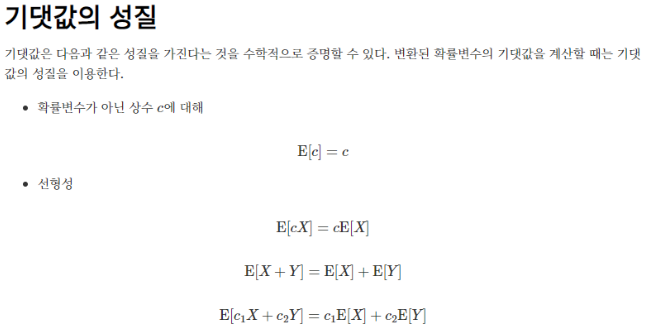

- 분산

분산은 우리가 원래 알고 있던 것처럼 편차 제곱의 기댓값이 된다.

In [57]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

In [58]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [59]:
V(X)

2.222

In [60]:
V(X, lambda x: 2*x + 3)

8.889

In [61]:
2**2 * V(X)

8.889

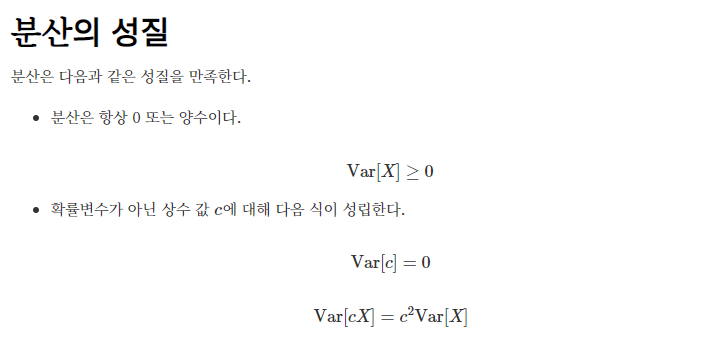

# 5.2 **2차원 이산형 확률변수**

## 5.2.1 **2차원 이산형 확률변수의 정의**

1차원 확률분포 2개를 동시에 다루는 변수 (X,Y)

우리 교재에서는 불공정한 주사위 2개를 사용하지만 여기서는 아래의 표를 봐주시길 바랍니다. 

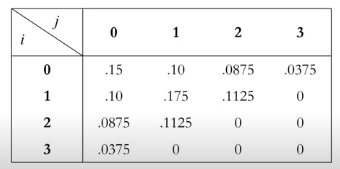

(X, Y) = {(i, j)|i=0, 1, 2, 3; j= 0, 1, 2, 3}

확률변수(X,Y)가 i, j를 취하는 확률 P

P = 결합확률함수

P(i, j) = P(i)*P(j)

  (p.130)

Joint Probability Distribution (결합확률분포)

"동시에" 







- 2차원 이산형 확률변수' 확률의 성질

  * P(i, j) >= 0
  * sum(P(i, j)) = 1 

In [62]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [63]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [64]:
XY = [x_set, y_set, f_XY]

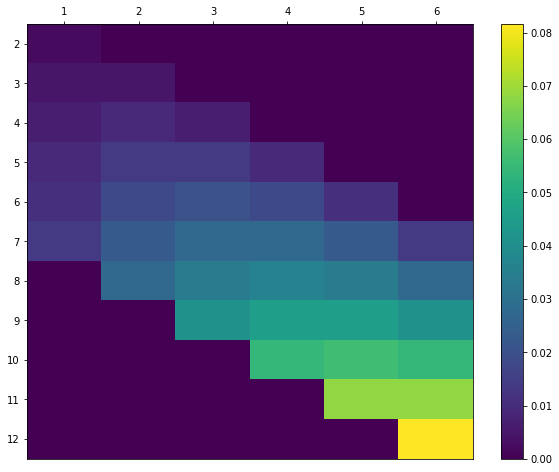

In [65]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [66]:
np.all(prob >= 0)

True

In [67]:
np.sum(prob)

1.000

- 주변확률분포

  * Marginal Probability Function(주변확률함수)
    
    결합확률분포에서 개별 확률변수에 관심.

    ex) X에 대해 궁금해, X 어떻게 움직이는지 궁금해.
      다른 조건들인 Y는 그대로 서 있고 X만 가봐.

      = X에 대한 주변확률 함수.

  * Marginal Probability Distribution(주변확률분포)


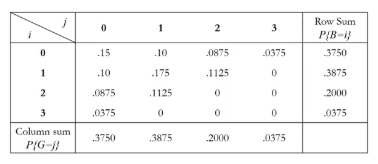

In [69]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [70]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [72]:
X = [x_set, f_X]
Y = [y_set, f_Y]

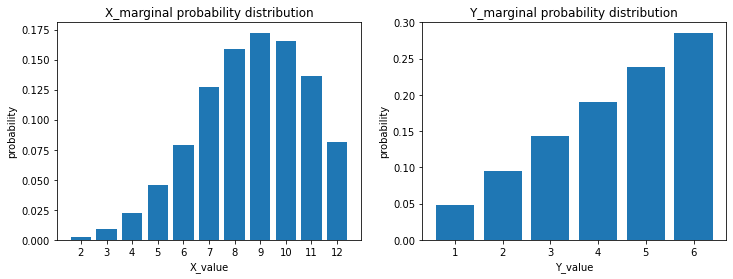

In [73]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

## 5.2.2 **2차원 이산형 확률변수의 지표**

- 기댓값 

In [74]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [75]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [76]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [77]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

In [78]:
a, b = 2, 3

In [79]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [80]:
a * mean_X + b * mean_Y

30.333

- 분산 

In [81]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444

In [82]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [83]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [84]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

- 공분산

In [85]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [86]:
cov_xy = Cov(XY)
cov_xy

2.222

In [87]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [88]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

- 상관계수

In [89]:
cov_xy / np.sqrt(var_X * var_Y)

0.707